# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="+ weather_api_key
#url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=e7644103fc45b86b253afdbf424b3d47"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marsa alam
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | mawlamyinegyunn
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | port augusta
Processing Record 8 of Set 1 | shush
Processing Record 9 of Set 1 | amos
Processing Record 10 of Set 1 | alofi
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | kwang binh
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | mansa
Processing Record 22 of Set 1 | ust-nera
Processing Recor

In [6]:
print(weather_api_key)

e7644103fc45b86b253afdbf424b3d47


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,marsa alam,25.0757,34.8918,26.66,51,0,4.74,EG,1699317196
1,albany,42.6001,-73.9662,8.66,63,25,2.24,US,1699317007
2,adamstown,-25.0660,-130.1015,22.81,83,100,7.48,PN,1699317196
3,mawlamyinegyunn,16.3833,95.2667,26.06,85,100,1.90,MM,1699317197
4,hawaiian paradise park,19.5933,-154.9731,27.73,73,40,4.12,US,1699317197


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsa alam,25.0757,34.8918,26.66,51,0,4.74,EG,1699317196
1,albany,42.6001,-73.9662,8.66,63,25,2.24,US,1699317007
2,adamstown,-25.0660,-130.1015,22.81,83,100,7.48,PN,1699317196
3,mawlamyinegyunn,16.3833,95.2667,26.06,85,100,1.90,MM,1699317197
4,hawaiian paradise park,19.5933,-154.9731,27.73,73,40,4.12,US,1699317197


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

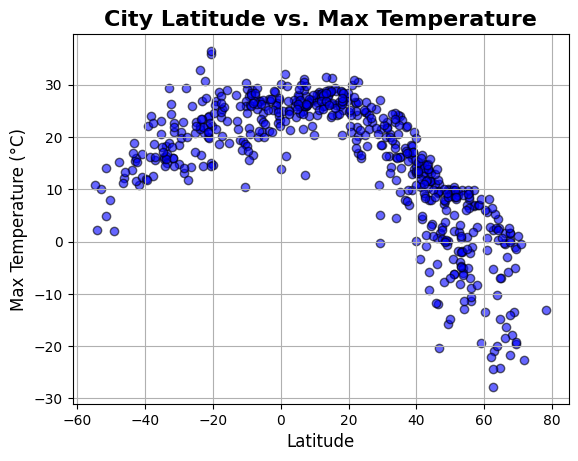

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Max Temp'], 
    color='blue', 
    alpha=0.6, 
    edgecolors='black'
)


# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°C)', fontsize=12)
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

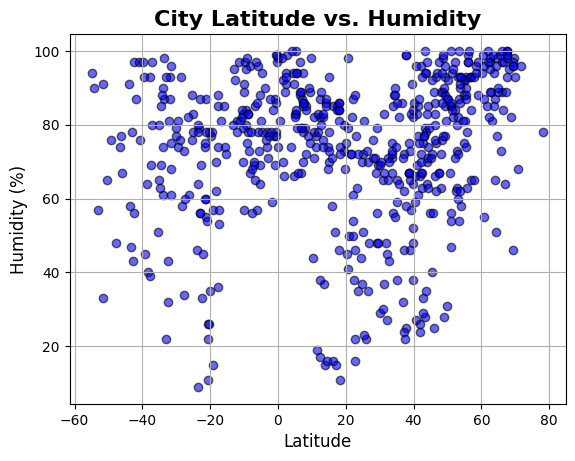

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    color='blue',
    alpha=0.6,
    edgecolors='black'

)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

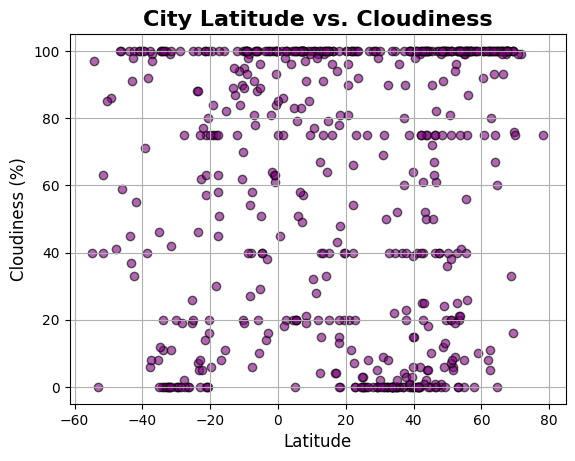

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Cloudiness'], 
    color='purple', 
    alpha=0.6, 
    edgecolors='black'
)


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

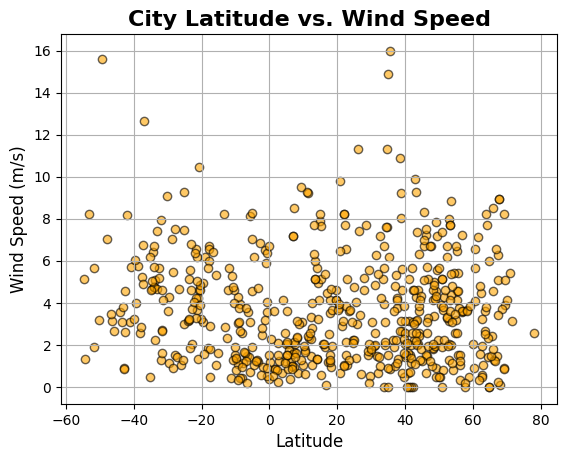

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'], 
    city_data_df['Wind Speed'], 
    color='orange', 
    alpha=0.6, 
    edgecolors='black'
    )


# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (m/s)', fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title, color):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

    # Create scatter plot
    plt.scatter(x, y, color=color, alpha=0.6, edgecolors='black')
    plt.plot(x, regress_values, color='red')

    # Add regression line equation
    plt.annotate(line_eq, (x.min(), y.max()-10), fontsize=12, color='red')

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,marsa alam,25.0757,34.8918,26.66,51,0,4.74,EG,1699317196
1,albany,42.6001,-73.9662,8.66,63,25,2.24,US,1699317007
3,mawlamyinegyunn,16.3833,95.2667,26.06,85,100,1.90,MM,1699317197
4,hawaiian paradise park,19.5933,-154.9731,27.73,73,40,4.12,US,1699317197
5,lihue,21.9789,-159.3672,26.77,82,100,8.23,US,1699317104


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,22.81,83,100,7.48,PN,1699317196
6,port augusta,-32.5000,137.7667,26.41,32,0,5.67,AU,1699317197
9,alofi,-19.0595,-169.9187,26.94,57,75,6.17,NU,1699317198
12,grytviken,-54.2811,-36.5092,2.14,90,97,1.31,GS,1699317199
13,kerikeri,-35.2268,173.9474,20.51,65,46,0.45,NZ,1699317199


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is: 0.7228604126229701


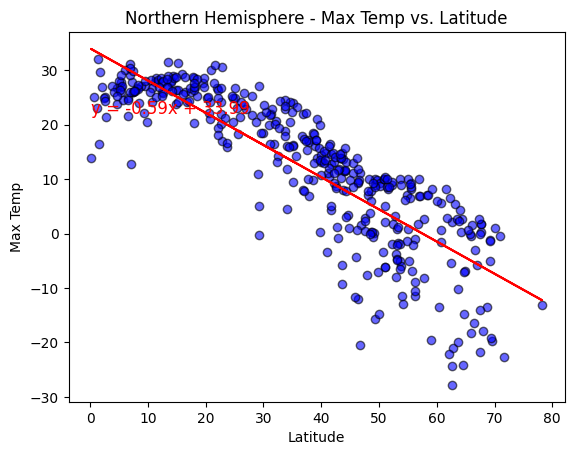

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude", "blue")

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
# The R-squared value is the square of the correlation coefficient (r_value)
r_squared = r_value**2
print(f"The R-squared value is: {r_squared}")

The R-squared value is: 0.4395765299779255


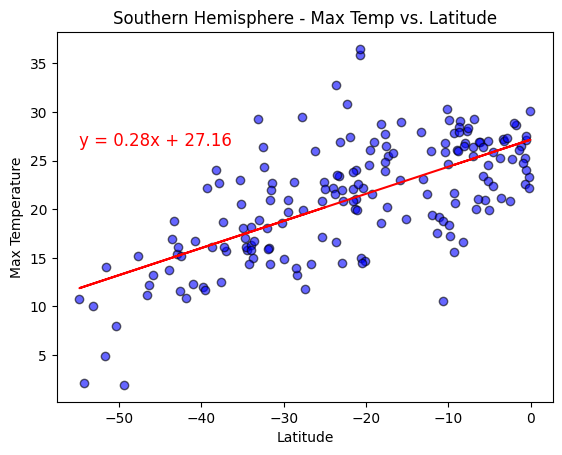

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature", "Southern Hemisphere - Max Temp vs. Latitude", "blue")

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# The R-squared value is the square of the correlation coefficient (r_value)
r_squared = r_value**2
print(f"The R-squared value is: {r_squared}")

**Discussion about the linear relationship:** A higher r value in the norhtern hemisphere: max temp vs latitude shows a stronger correlation. While a r value = .53~ shows a mild correlation in the southern hemisphere: Max temp vs Latitude 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient (r-value) is: 0.2009909129650262


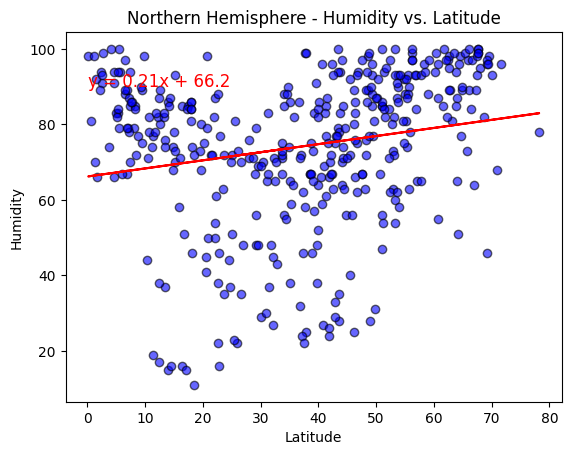

In [20]:
# Northern Hemisphere Humidity vs Latitude linear regression plot
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Northern Hemisphere - Humidity vs. Latitude", "blue")

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

print(f"The correlation coefficient (r-value) is: {r_value}")

The correlation coefficient (r-value) is: 0.17139012525196035


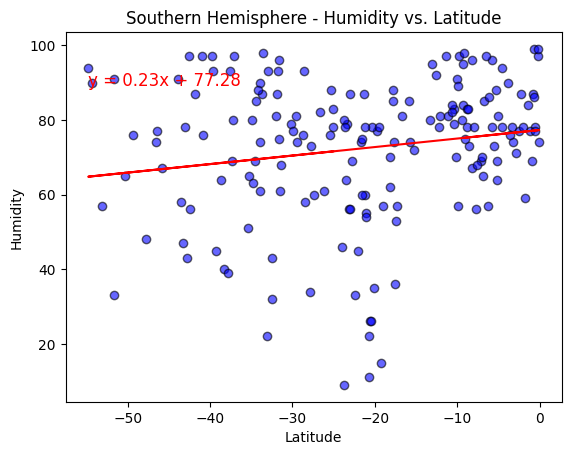

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Southern Hemisphere - Humidity vs. Latitude", "blue")

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

print(f"The correlation coefficient (r-value) is: {r_value}")

**Discussion about the linear relationship:** The small r-values suggest a limited or no connection between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

Text(0.15, 80, 'R-squared = 0.0')

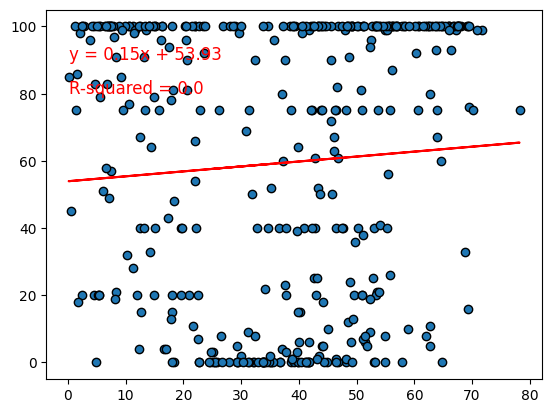

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors='black')
# Add regression line
plt.plot(x_values, regress_values, "r-")

# Add equation and R-squared value
plt.annotate(line_eq, (min(x_values),max(y_values)-10), fontsize=12, color="red")
plt.annotate(f"R-squared = {round(rvalue**2,2)}", (min(x_values),max(y_values)-20), fontsize=12, color="red")

R value = 0.19


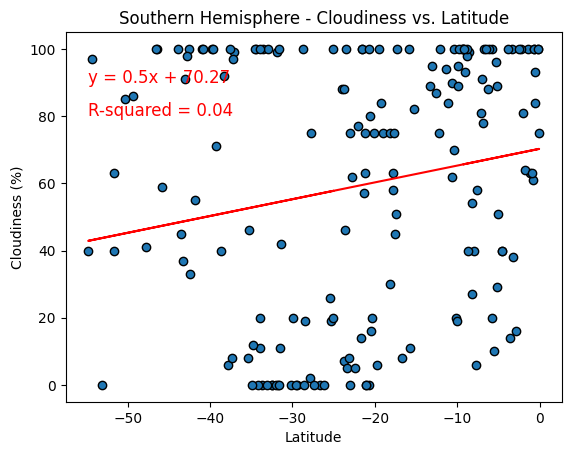

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors='black')

# Add regression line
plt.plot(x_values, regress_values, "r-")

# Add equation and R-squared value
plt.annotate(line_eq, (min(x_values),max(y_values)-10), fontsize=12, color="red")
plt.annotate(f"R-squared = {round(rvalue**2,2)}", (min(x_values),max(y_values)-20), fontsize=12, color="red")

# Add labels and title
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Print the R value
print(f"R value = {round(rvalue, 2)}")

# Display the plot
plt.show()

**Discussion about the linear relationship:** the low r values show a positive relationship between cloudiness vs latitude however it isn't a strong correlation

### Wind Speed vs. Latitude Linear Regression Plot

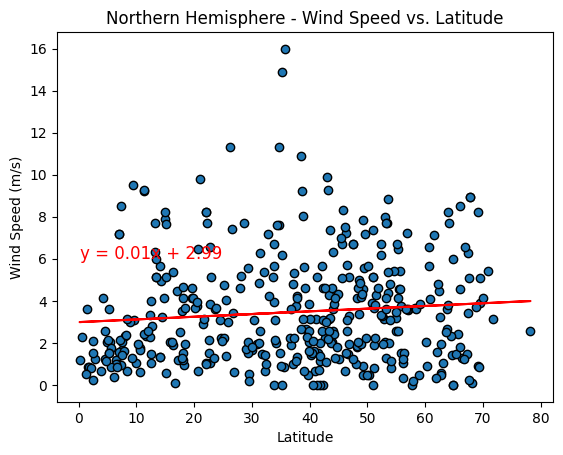

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors='black')

# Add regression line
plt.plot(x_values, regress_values, "r-")

# Add equation and r-value
plt.annotate(line_eq, (min(x_values),max(y_values)-10), fontsize=12, color="red")
plt.annotate(f"r = {round(rvalue, 2)}", (min(x_values),max(y_values)-20), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Show plot
plt.show()

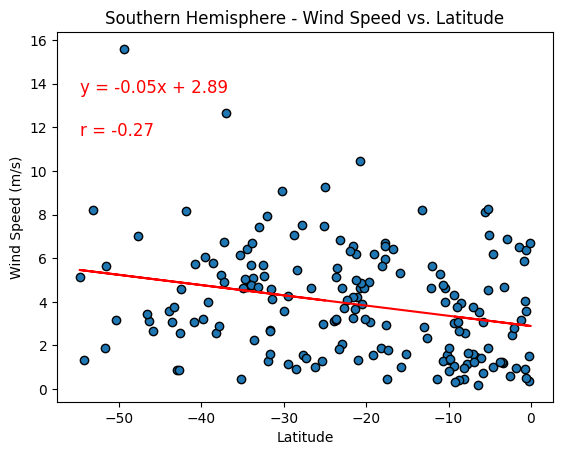

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot
plt.scatter(x_values, y_values, edgecolors='black')

# Add regression line
plt.plot(x_values, regress_values, "r-")

# Add equation and r-value
plt.annotate(line_eq, (min(x_values),max(y_values)-2), fontsize=12, color="red")
plt.annotate(f"r = {round(rvalue, 2)}", (min(x_values),max(y_values)-4), fontsize=12, color="red")

# Set labels and title
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Show plot
plt.show()


**Discussion about the linear relationship:** low r value shows no real relationship between wind speed and latitude. 